In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

def plot_errorbars(arg, x, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

# 1 - Medidas de Velocidade

In [2]:
data = pd.read_csv('measures.csv')

In [3]:
df = data[(data.Service == 'Speedtest') & (data.Network == 'Claro Brazil')]
print(len(df.index))

57


## Download

In [4]:
df['Download'].describe()

count     57.000000
mean     320.203994
std       70.197036
min      117.919965
25%      274.923588
50%      329.808163
75%      381.975509
max      426.511815
Name: Download, dtype: float64

In [5]:
print("Median: ", df['Download'].median())

Median:  329.8081631233671


In [6]:
print("Intervalo de Confiança com Distribuição Normal")
norm_interval_download = st.norm.interval(confidence=0.95, loc=df['Download'].mean(), scale=st.sem(df['Download']))

Intervalo de Confiança com Distribuição Normal


In [7]:
print("Intervalo de Confiança sem Distribuição Normal")
data_down = df.sample(n = 20, random_state = 8)
non_norm_interval_download = st.t.interval(confidence=0.95, df=len(data_down.index), loc=data_down['Download'].mean(), scale=st.sem(data_down['Download']))
non_norm_interval_download

Intervalo de Confiança sem Distribuição Normal


(307.45033904741365, 360.35203686692967)

In [8]:
st.shapiro(df['Download'])

ShapiroResult(statistic=0.9431411027908325, pvalue=0.009721919894218445)

Dados **não** possuem distibuição normal

<AxesSubplot: >

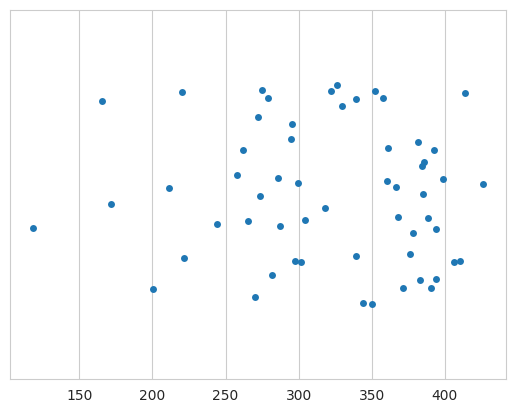

In [9]:
sns.stripplot(x=df['Download'].to_numpy(), jitter=.3)

## Upload

In [10]:
df['Upload'].describe()

count     57.000000
mean     199.613875
std       47.735347
min       35.613755
25%      179.671899
50%      216.526671
75%      235.022191
max      275.290724
Name: Upload, dtype: float64

In [11]:
print("Median: ", df['Upload'].median())

Median:  216.526670875809


In [12]:
print("Intervalo de Confiança com Distribuição Normal")
st.norm.interval(confidence=0.95, loc=df['Upload'].mean(), scale=st.sem(df['Upload']))

Intervalo de Confiança com Distribuição Normal


(187.2216080026211, 212.00614136752216)

In [13]:
print("Intervalo de Confiança sem Distribuição Normal")
data_up = df.sample(n = 20, random_state = 8)
st.t.interval(confidence=0.95, df=len(data_down.index), loc=data_up['Upload'].mean(), scale=st.sem(data_up['Upload']))

Intervalo de Confiança sem Distribuição Normal


(158.83894712456708, 208.34152570010656)

In [14]:
min_down_inst = 200
min_down_med = 400

min_up_inst = 120
min_up_med = 240

print("Abaixo do Instantâneo (Download): ", len(df[(df.Download < min_down_inst)].index))
print("Abaixo do Instantâneo (Upload): ", len(df[(df.Download < min_up_inst)].index))

Abaixo do Instantâneo (Download):  3
Abaixo do Instantâneo (Upload):  1


In [15]:
# Teste de Normalidade
st.shapiro(df['Upload'])

ShapiroResult(statistic=0.8922117352485657, pvalue=0.00010304114402970299)

Dados **não** possuem distibuição normal

<AxesSubplot: >

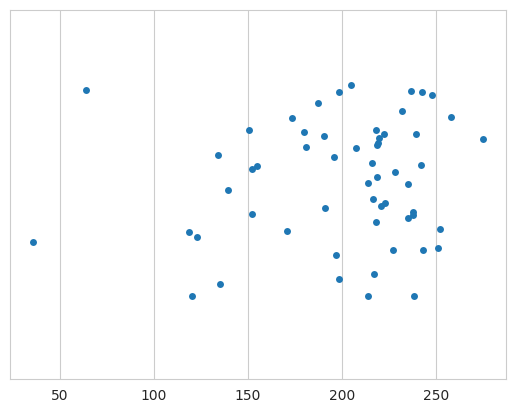

In [16]:
sns.stripplot(x=df['Upload'].to_numpy(), jitter=.3)

Text(0.5, 1.0, 'Velocidades de Upload')

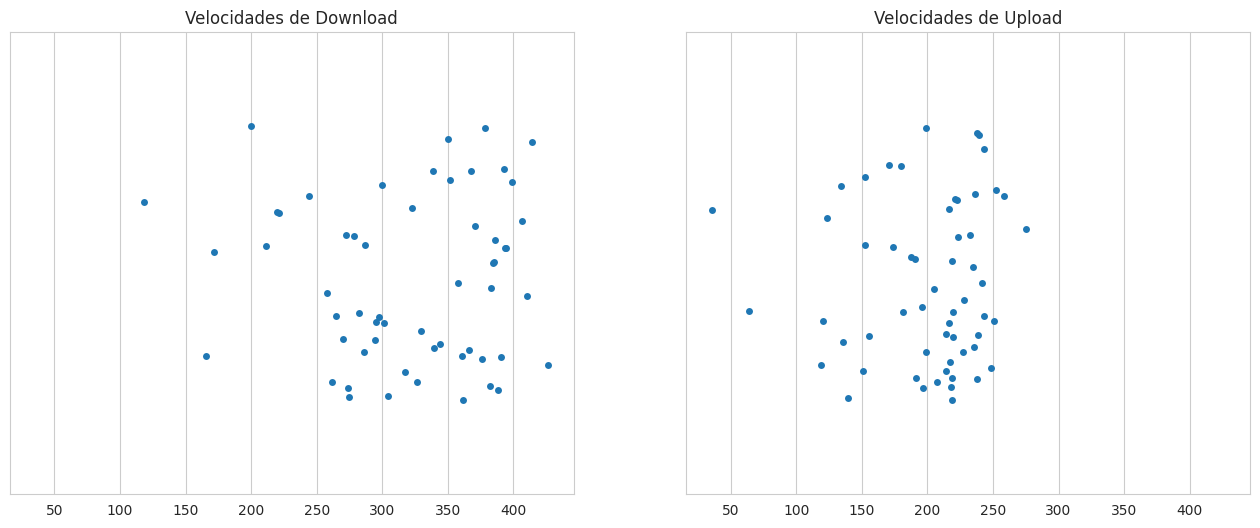

In [50]:
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(4*4, 2*3))

sns.stripplot(x=df['Download'].to_numpy(), jitter=.3, ax=axes[0])
sns.stripplot(x=df['Upload'].to_numpy(), jitter=.3, ax=axes[1])

axes[0].set_title("Velocidades de Download")
axes[1].set_title("Velocidades de Upload")

# 2 - Comparando Medidores

Utilizando: Speedtest e Brasil Banda Larga

In [17]:
def compare_mean(first, second):
    diffs = second.to_numpy() - first.to_numpy()
    d_mean = np.mean(diffs)
    d_std = np.std(diffs)
    d_int = st.t.interval(confidence=0.90, df=len(diffs)-1, loc=d_mean, scale=st.sem(diffs))
    print("%f <= u <= %f" %(d_int[0], d_int[1]))

In [18]:
second = pd.read_csv('measures.csv')

In [19]:
# Fast

fast = second[(second.Service == 'Fast') & (second.Network == 'Claro Brazil')]
fast['Download'].describe()

count      57.000000
mean      510.175439
std       144.660825
min       290.000000
25%       420.000000
50%       500.000000
75%       560.000000
max      1300.000000
Name: Download, dtype: float64

In [20]:
fast['Download'].median()

500.0

In [21]:
bbl = second[(second.Service == 'Brasil Banda Larga') & (second.Network == 'Claro Brazil')]
bbl['Download'].describe()

count     57.000000
mean     350.811579
std      101.499899
min      114.350000
25%      291.620000
50%      402.520000
75%      422.680000
max      486.200000
Name: Download, dtype: float64

In [22]:
bbl['Download'].median()

402.52

<AxesSubplot: >

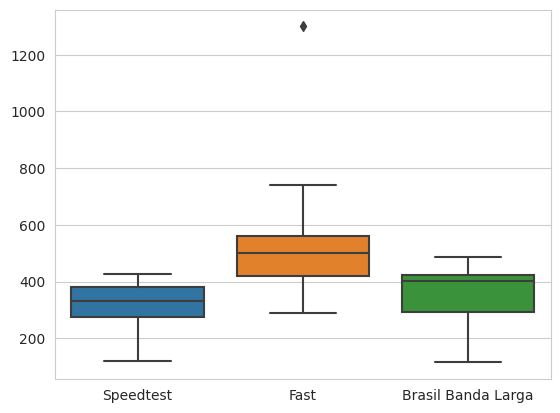

In [23]:
dt = pd.DataFrame({'Speedtest': df['Download'], 'Fast': fast['Download'], 'Brasil Banda Larga': bbl['Download']})
sns.boxplot(data=dt,dodge = True)

## Download

In [24]:
second = second[(second.Service == 'Brasil Banda Larga') & (second.Network == 'Claro Brazil')]
compare_mean(df['Download'], second['Download'])

6.596951 <= u <= 54.618219


## Upload

In [25]:
compare_mean(df['Upload'], second['Upload'])

-104.185294 <= u <= -80.102455


In [26]:
st.kruskal(df['Download'], fast['Download'], bbl['Download'])

KruskalResult(statistic=77.40610364519385, pvalue=1.554097137913673e-17)

# 4 - Comparando Provedores

In [27]:
other = pd.read_csv('data.csv')
other['Download'].describe()

count    16.00000
mean     78.63500
std       6.05801
min      63.33000
25%      75.08000
50%      81.95000
75%      82.71500
max      83.86000
Name: Download, dtype: float64

Como as variâncias são muito diferentes, é improvável que a variância das populações sejam iguais

In [28]:
st.shapiro(other['Download'])

ShapiroResult(statistic=0.7830498218536377, pvalue=0.0016362109454348683)

Dados **não** possuem distibuição normal

In [29]:
st.shapiro(other['Upload'])

ShapiroResult(statistic=0.9876708388328552, pvalue=0.9970650672912598)

Dados possuem distibuição normal

## Download

In [30]:
st.ranksums(df['Download'], other['Download'], alternative='less')

RanksumsResult(statistic=6.080540516514381, pvalue=0.9999999994011096)

## Upload

In [31]:
md = df['Upload'].mean()
mo = other['Upload'].mean()

idf = st.norm.interval(confidence=0.95, loc=df['Upload'].mean(), scale=st.sem(df['Upload']))
iot = st.norm.interval(confidence=0.95, loc=other['Upload'].mean(), scale=st.sem(other['Upload']))

print(idf)
print(iot)

(187.2216080026211, 212.00614136752216)
(79.79326699628896, 82.65298300371106)


Pelos intervalos é possível notar que não há sobreposição

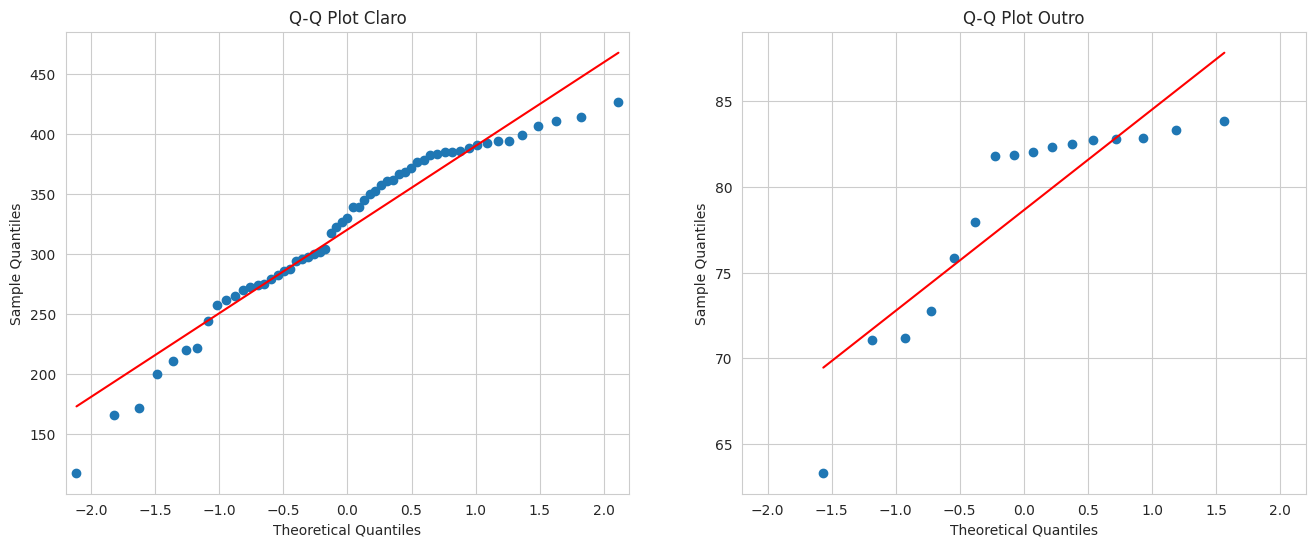

In [47]:
a = df['Download'].to_numpy()
b = other['Download'].to_numpy()

fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(4*4, 2*3))


sm.qqplot(a, line='s', ax=axes[0])
sm.qqplot(b, line='s', ax=axes[1])

axes[0].set_title("Q-Q Plot Claro")
axes[1].set_title("Q-Q Plot Outro")

plt.show()